In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
df = pd.read_csv('c:/bd092_data/app_data.csv')
df.head()

,App,Category,Rating,Reviews,Installs,Price
0,Garden Fruit Legend,FAMILY,4,4289,500000,0.0
1,BlackJack 21 Pro,GAME,4,26744,500000,0.0
2,EO Network,BUSINESS,3,13,1000,0.0
3,Sayers AH,MEDICAL,1,2,50,0.0
4,BD All Results,FAMILY,4,205,50000,0.0


In [9]:
df.info() #null 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       503 non-null    object 
 1   Category  503 non-null    object 
 2   Rating    503 non-null    int64  
 3   Reviews   503 non-null    int64  
 4   Installs  503 non-null    int64  
 5   Price     503 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 23.7+ KB


In [10]:
df.describe()

,Rating,Reviews,Installs,Price
count,503.000000,5.030000e+02,5.030000e+02,503.000000
mean,3.616302,3.114368e+05,6.351265e+06,0.477793
std,0.904775,1.445690e+06,1.935525e+07,2.021677
min,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,3.000000,2.300000e+01,1.000000e+03,0.000000
50%,4.000000,1.063000e+03,1.000000e+05,0.000000
75%,4.000000,4.397500e+04,1.000000e+06,0.000000
max,5.000000,2.313478e+07,1.000000e+08,24.990000


In [11]:
df.head(n=10)

,App,Category,Rating,Reviews,Installs,Price
0,Garden Fruit Legend,FAMILY,4,4289,500000,0.0
1,BlackJack 21 Pro,GAME,4,26744,500000,0.0
2,EO Network,BUSINESS,3,13,1000,0.0
3,Sayers AH,MEDICAL,1,2,50,0.0
4,BD All Results,FAMILY,4,205,50000,0.0
5,dB Sound Level Meter,TOOLS,3,203,10000,0.0
6,My OldBoy! Free - GBC Emulator,GAME,4,51787,5000000,0.0
7,ZOMBIE RIPPER,GAME,3,16073,500000,0.0
8,BkEmu - BK-0010/11M emulator,FAMILY,4,222,10000,0.0
9,Block Puzzle,GAME,4,59800,5000000,0.0


In [14]:
cat = df['Category'].value_counts()

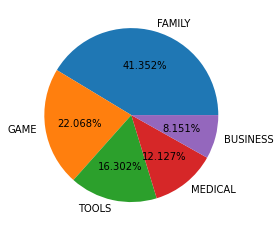

In [15]:
plt.pie(cat, labels=cat.index, autopct='%.3f%%')
plt.show()

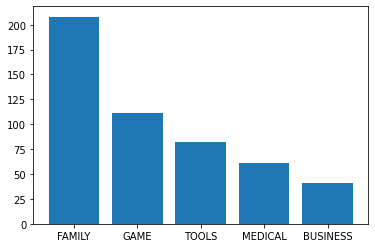

In [17]:
plt.bar(cat.index, cat)
plt.show()

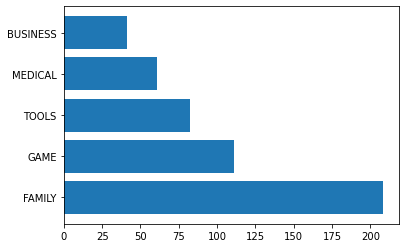

In [18]:
plt.barh(cat.index, cat)
plt.show()

In [19]:
#family, game, tools 3개가 가장 유망 카테고리다.
df.head()

,App,Category,Rating,Reviews,Installs,Price
0,Garden Fruit Legend,FAMILY,4,4289,500000,0.0
1,BlackJack 21 Pro,GAME,4,26744,500000,0.0
2,EO Network,BUSINESS,3,13,1000,0.0
3,Sayers AH,MEDICAL,1,2,50,0.0
4,BD All Results,FAMILY,4,205,50000,0.0


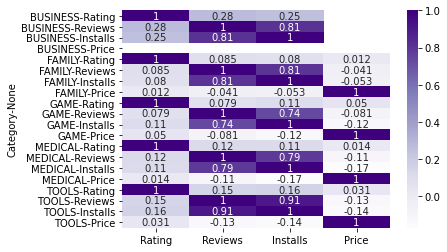

In [31]:
df.groupby('Category').corr()
import seaborn as sns
sns.heatmap(df.groupby('Category').corr(), cmap='Purples', annot=True)

#review - install / install - review 사이에 유의미한 양의 선형관계 발견함. 
# 가설 1. review 가 증가하면 install도 증가할 것이다. 
# 가설 2. install이 증가하면 review도 증가할 것이다. 
# 둘 사이에 인과관계가 있는가? 
# 인과관계가 있다면, 어느것이 독립변수고, 어느것이 종속변수일까? 

In [33]:
#가설 1 review 가 증가하면 install도 증가할 것이다.
df.head()

,App,Category,Rating,Reviews,Installs,Price
0,Garden Fruit Legend,FAMILY,4,4289,500000,0.0
1,BlackJack 21 Pro,GAME,4,26744,500000,0.0
2,EO Network,BUSINESS,3,13,1000,0.0
3,Sayers AH,MEDICAL,1,2,50,0.0
4,BD All Results,FAMILY,4,205,50000,0.0


In [37]:
x = df['Reviews']
y = df['Installs']

In [41]:
x1 = sm.add_constant(x, has_constant='add')
x1.head()

,const,Reviews
0,1.0,4289
1,1.0,26744
2,1.0,13
3,1.0,2
4,1.0,205


In [44]:
single_model = sm.OLS(y, x1).fit()
single_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     637.9
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           2.17e-91
Time:                        23:03:14   Log-Likelihood:                -8946.3
No. Observations:                 503   AIC:                         1.790e+04
Df Residuals:                     501   BIC:                         1.790e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.231e+06   5.86e+05      5.512      0.000    2.08e+06    4.38e+06
Reviews       10.0198      0.397     25.257      0.000       9.240      10.799
==============================================================================
Omnibus:                      244.397   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32693.097
Skew:                           1.040   Prob(JB):                         0.00
Kurtosis:                      42.441   Cond. No.                     1.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# review가 1단위 증가할때 install도 10.0198 만큼 증가 
# review와 install은 강한 인과관계에 있다. 

# 반대는?

In [46]:
y = df['Reviews']
x = df['Installs']

In [47]:
x1 = sm.add_constant(x, has_constant='add')
x1.head()

,const,Installs
0,1.0,500000
1,1.0,500000
2,1.0,1000
3,1.0,50
4,1.0,50000


In [48]:
single_model = sm.OLS(y, x1).fit()
single_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reviews   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     637.9
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           2.17e-91
Time:                        23:10:08   Log-Likelihood:                -7641.3
No. Observations:                 503   AIC:                         1.529e+04
Df Residuals:                     501   BIC:                         1.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.36e+04    4.5e+04     -0.968      0.334   -1.32e+05    4.49e+04
Installs       0.0559      0.002     25.257      0.000       0.052       0.060
==============================================================================
Omnibus:                      929.294   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1087128.509
Skew:                          11.714   Prob(JB):                         0.00
Kurtosis:                     229.544   Cond. No.                     2.14e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# install이 1단위 증가할때 review는 0.0559만큼 증가한다.
# 인과관계에 있기는 하지만, review 독립변수보다 약하다. 
# --> review 가 증가할수록 install은 크게 증가한다. 는 결론 도출.

# family, game, tools 유형 중 선택해서 앱 개발하는 것 괜찮은 선택.(수요가 많다.)
# review가 증가할 수록 install이 크게 증가하니까, 소비자 review 많이 쓰게 하는 정책 쓰면 좋다. 